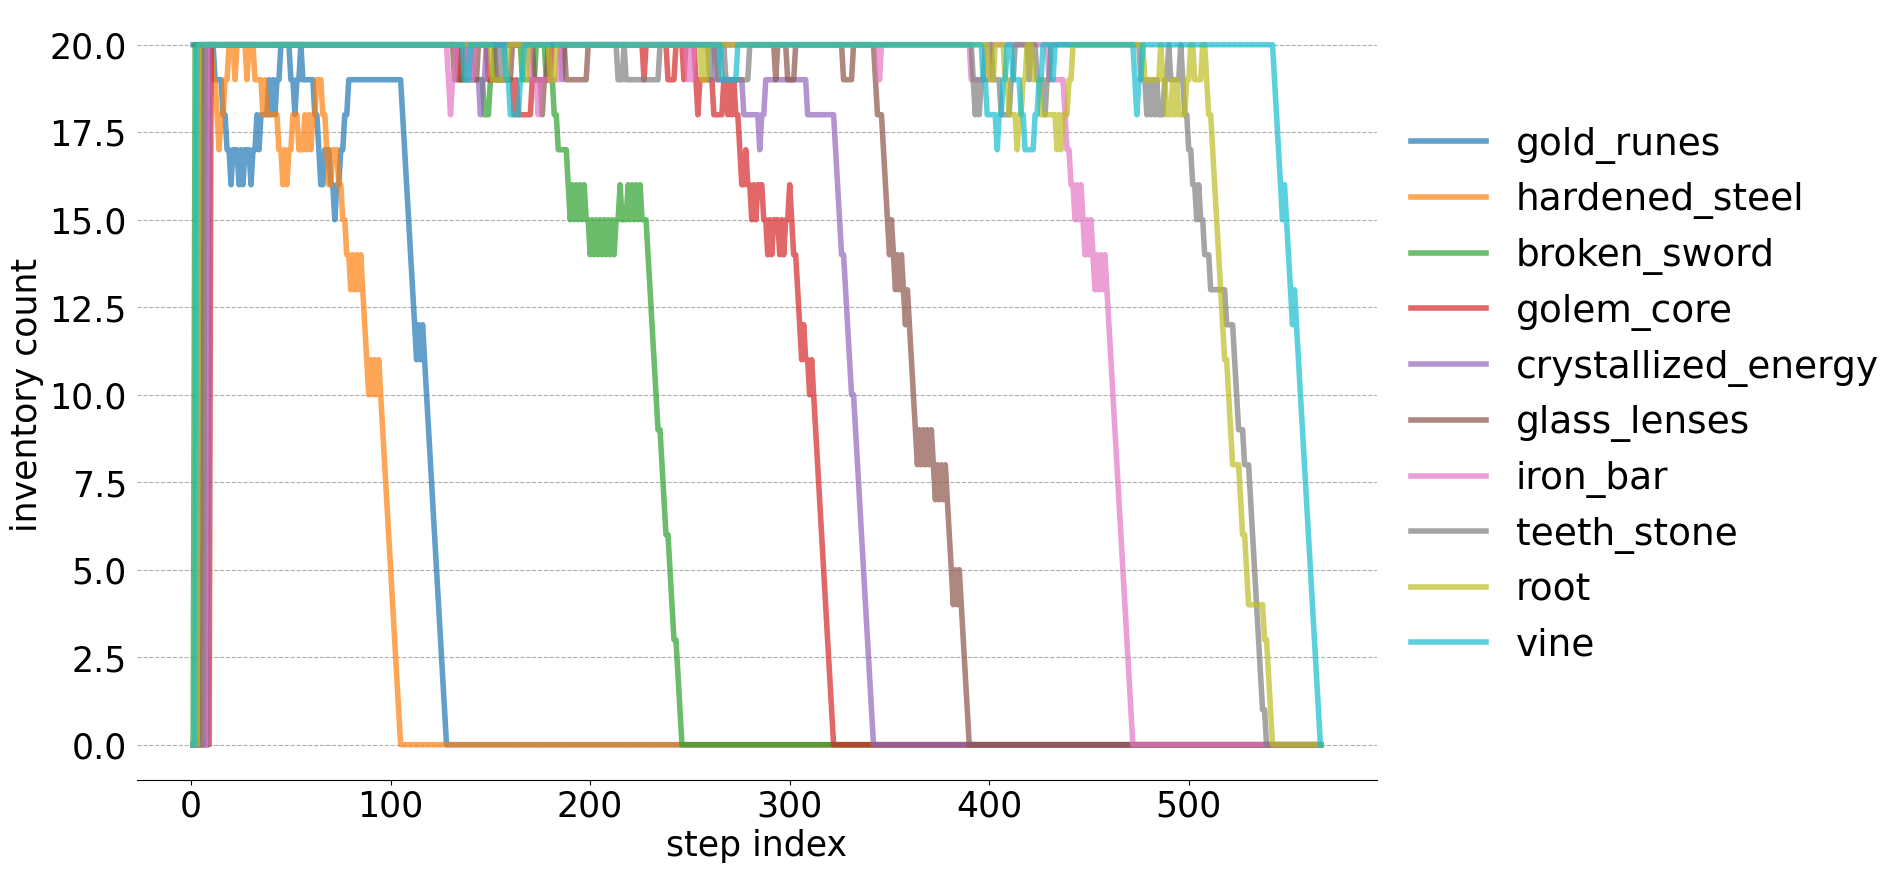

In [171]:
fig, ax = plt.subplots(1, 1)
fontsize = 25
legend_fontsize = 27
(
    query_data("""
        select 
            rowid,
            * 
        from inventory_changes        
    """)
    .pivot(
        index='rowid',
        columns='item',
        values='change')
    .fillna(0)
    .cumsum()
    [[
        'gold_runes', 'hardened_steel', 'broken_sword', 'golem_core',
        'crystallized_energy', 'glass_lenses', 'iron_bar', 'teeth_stone', 
        'root', 'vine']]
    .plot(
        fontsize=fontsize,
        linewidth=4,
        ax=ax,
        alpha=0.7,
        aa=True,
        figsize=(20, 10)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.tick_params(left = False) 
ax.grid(axis='y', linestyle='--')
plt.xlabel('step index', fontsize=fontsize)
plt.ylabel('inventory count', fontsize=fontsize)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(
    fontsize=legend_fontsize,
    frameon=False, 
    loc='center left', 
    bbox_to_anchor=(1, 0.5))
# fig.tight_layout()
fig.savefig(
    '/Users/cmshymansky/documents/code/websites/cmshymansky/website/static/img/item_inventory_counts.webp', 
    format='webp',
    bbox_inches = "tight",
    dpi=300
)

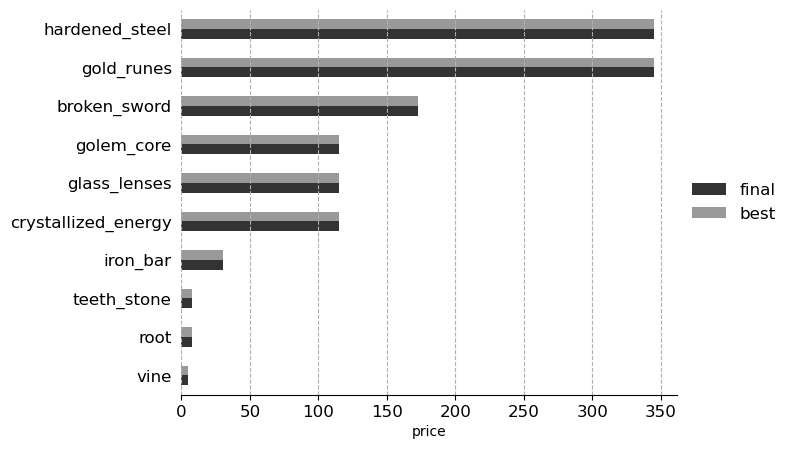

In [172]:
fontsize = 12
legend_fontsize = 12
fig, ax = plt.subplots(1, 1)
(
    prices_and_bounds    
    .groupby(
        'item', 
        # include_groups=False
        # include_groups=False
    )
    .apply(
        lambda x: (
            x            
            .tail(1)
            ['price']
            .values[0]),
        include_groups=False
    )
    .reset_index()    
    .rename(columns={0: 'final_price'})
    .merge(
        (
            query_data("""
                select
                    item,
                    expensive_upper as best_price
                from price_reaction_bounds
            """)
        ),
        on='item',
        how='left'
    )
    .set_index('item')
    .sort_values('final_price')
    .rename(columns={'final_price': 'final', 'best_price': 'best'})
    .plot.barh(
        ax=ax,
        color=['black', 'grey'],
        alpha=0.8, 
        aa=True, 
        fontsize=fontsize,
        figsize=(8, 5))
    
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.tick_params(left = False) 
ax.grid(axis='x', linestyle='--')
plt.xlabel('price')
plt.ylabel('')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(
    fontsize=legend_fontsize,
    frameon=False, 
    loc='center left', 
    bbox_to_anchor=(1, 0.5))
fig.savefig(
    '/Users/cmshymansky/documents/code/websites/cmshymansky/website/static/img/best_and_final_item_prices.webp', 
    format='webp', 
    bbox_inches = "tight",
    dpi=300
)

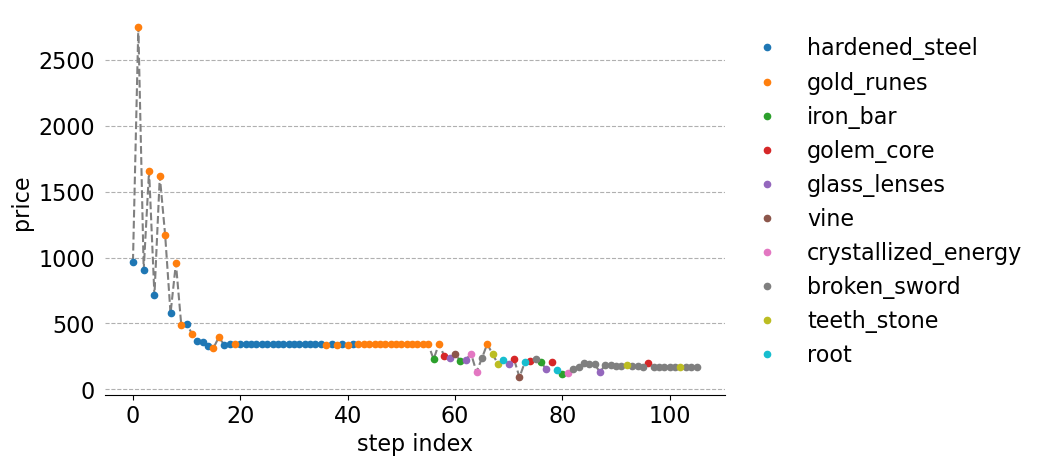

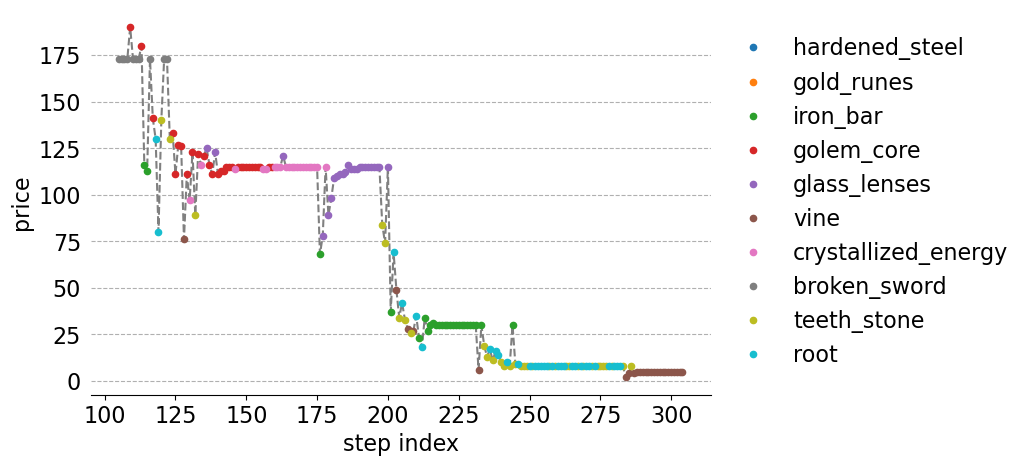

In [173]:
reaction_step_item_prices = (
    query_data(
        """
        select
            *
        from reactions
        """)
    .reset_index()
    .rename(columns={'index': 'reaction_step'})
    [['reaction_step', 'item', 'price']]    
)
fontsize = 16
legend_fontsize = fontsize
fig, ax = plt.subplots(1, 1)
markersize = 4.5
(
    reaction_step_item_prices   
    .pipe(lambda x: x[x['reaction_step'] <= 105])
    .set_index('reaction_step')
    ['price']
    .plot(
        aa=True,
        ax=ax,
        # xlim=[100, 350],
        # xlim=[-1, 105],
        figsize=(10, 5),
        label='',
        color='grey',
        style='--')
)
for item in reaction_step_item_prices['item'].unique():
    (
        reaction_step_item_prices
        .pipe(lambda x: x[x['reaction_step'] <= 105])
        .pipe(lambda x: x[x['item'] == item])
        .set_index('reaction_step')
        ['price']
        .plot(
            aa=True,
            fontsize=fontsize,
            ms=markersize,
            ax=ax,
            figsize=(10, 5),
            label=item, 
            style='o')
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.tick_params(left = False) 
ax.grid(axis='y', linestyle='--')
plt.xlabel('step index', fontsize=fontsize)
plt.ylabel('price', fontsize=fontsize)
plt.legend(fontsize=legend_fontsize)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(
    fontsize=legend_fontsize,
    frameon=False, 
    loc='center left', 
    bbox_to_anchor=(1, 0.5))

fig.savefig(
    '/Users/cmshymansky/documents/code/websites/cmshymansky/website/static/img/ordered_reaction_items_and_prices_1st_105.webp', 
    format='webp', 
    bbox_inches = "tight",
    dpi=300
)

fig, ax = plt.subplots(1, 1)
(
    reaction_step_item_prices  
    .pipe(lambda x: x[x['reaction_step'] >= 105])
    .set_index('reaction_step')
    ['price']
    .plot(
        aa=True,
        ax=ax,
        label='',
        # xlim=[100, 350],
        # xlim=[105, 350],
        figsize=(10, 5),
        color='grey',
        style='--')
)

for item in reaction_step_item_prices['item'].unique():
    (
        reaction_step_item_prices
        .pipe(lambda x: x[x['reaction_step'] >= 105])
        .pipe(lambda x: x[x['item'] == item])
        .set_index('reaction_step')
        ['price']
        .plot(
            aa=True,
            ms=markersize,
            fontsize=fontsize,
            ax=ax,
            figsize=(10, 5),
            label=item, 
            style='o')
    )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.tick_params(left = False) 
ax.grid(axis='y', linestyle='--')
plt.xlabel('step index', fontsize=fontsize)
plt.ylabel('price', fontsize=fontsize)
plt.legend(fontsize=legend_fontsize)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(
    fontsize=legend_fontsize,
    frameon=False, 
    loc='center left', 
    bbox_to_anchor=(1, 0.5))
fig.savefig(
    '/Users/cmshymansky/documents/code/websites/cmshymansky/website/static/img/ordered_reaction_items_and_prices_1st_remaining.webp', 
    format='webp', 
    bbox_inches = "tight",
    dpi=300
)




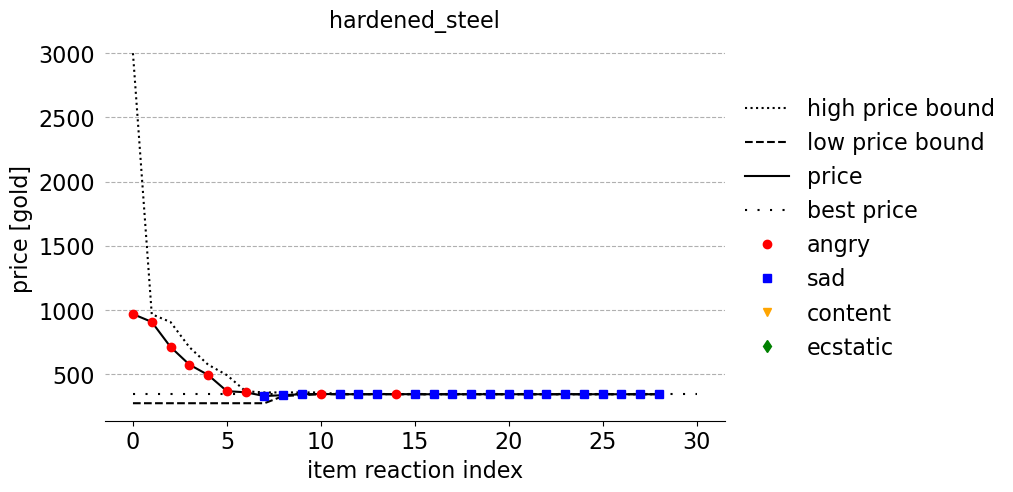

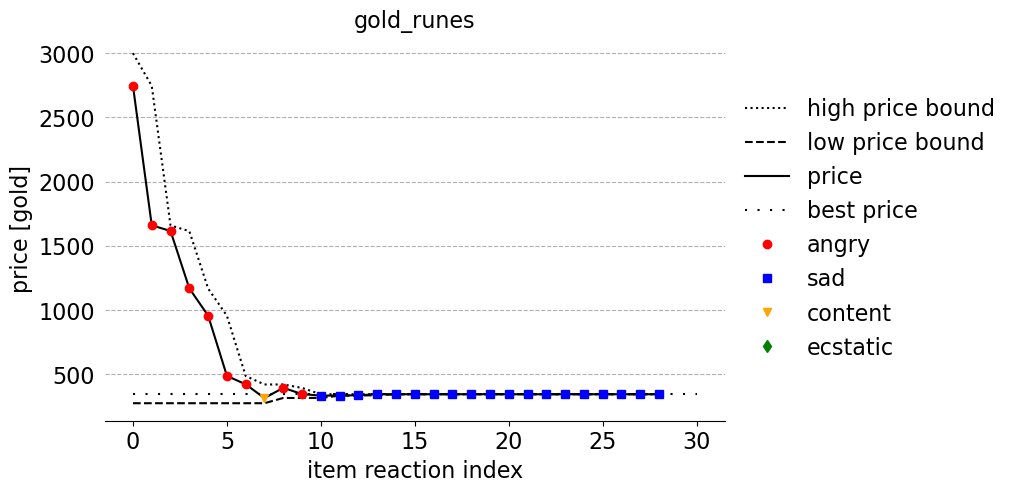

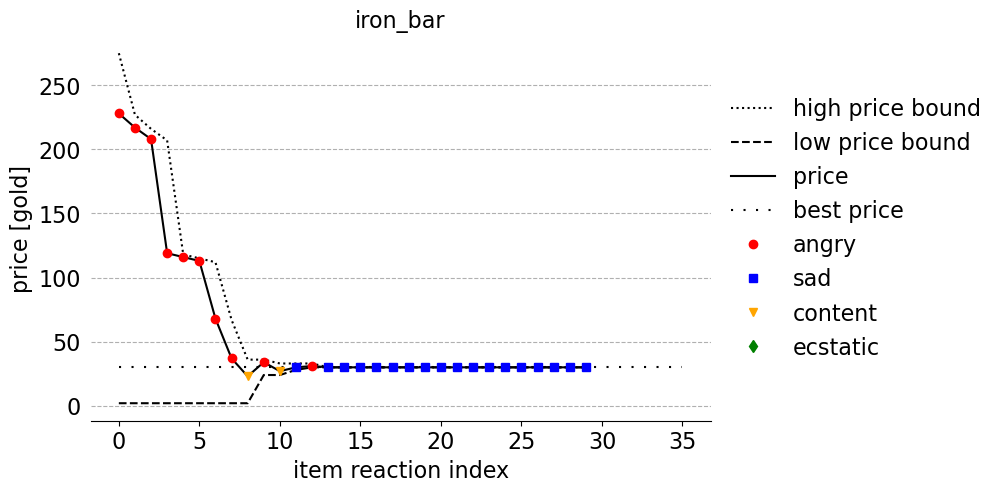

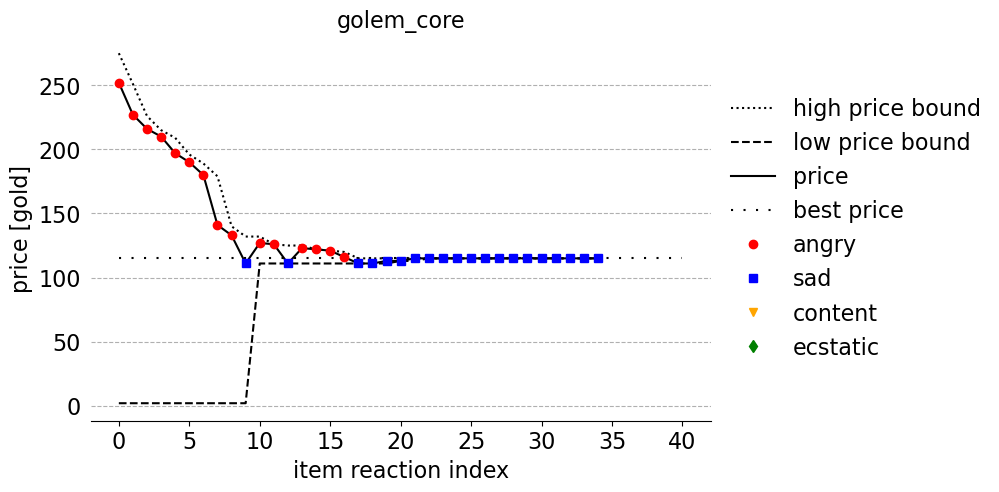

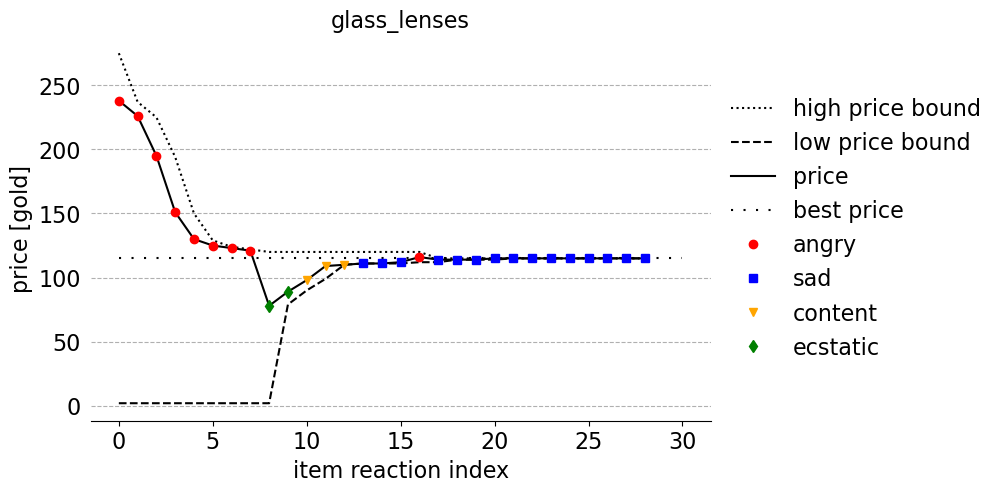

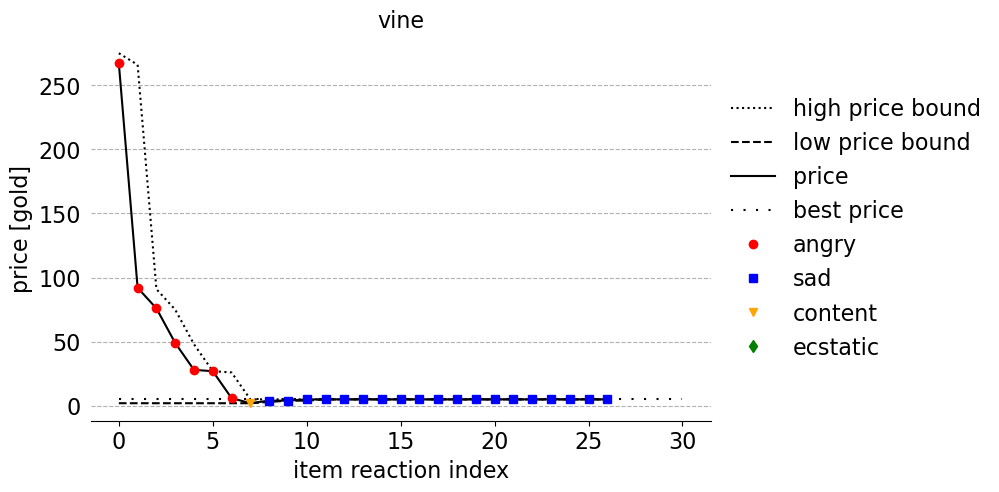

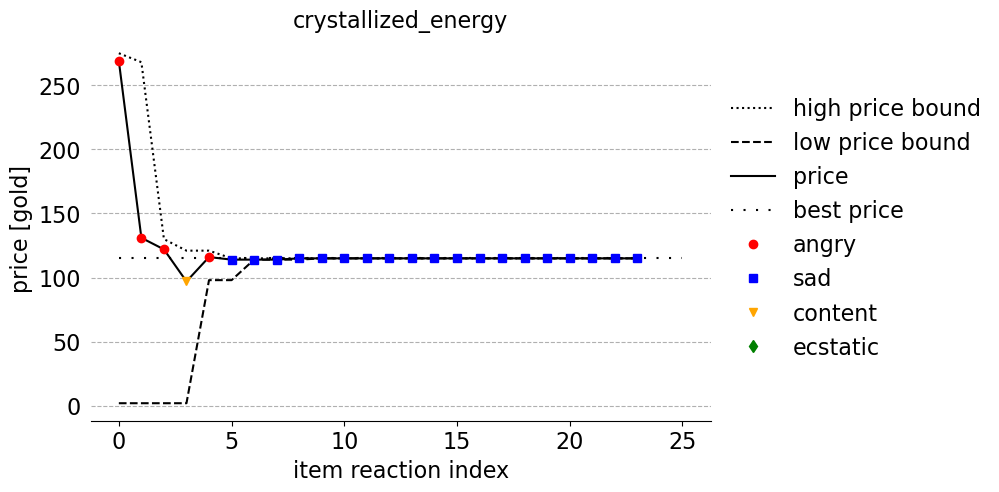

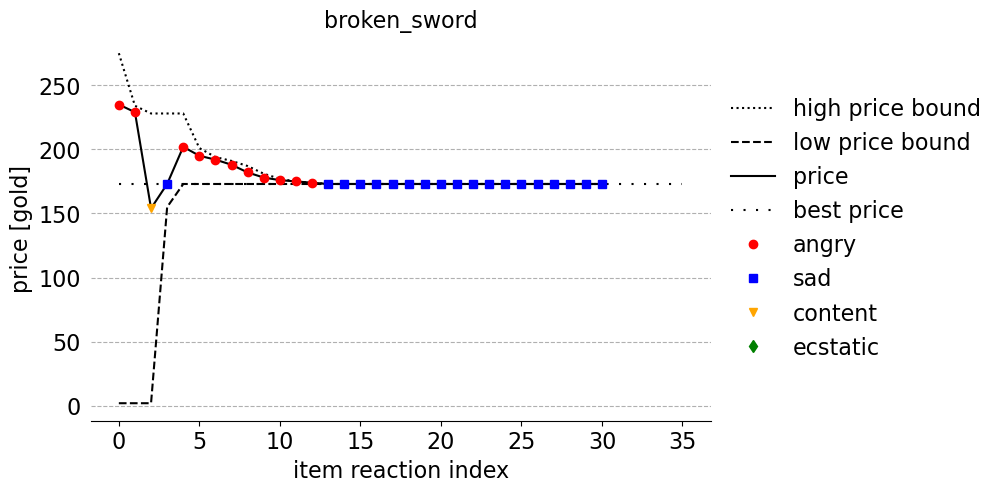

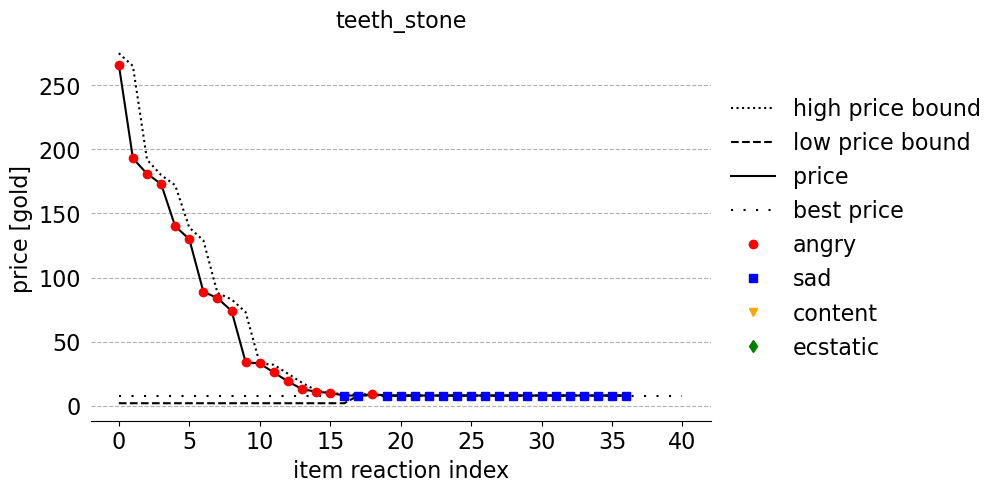

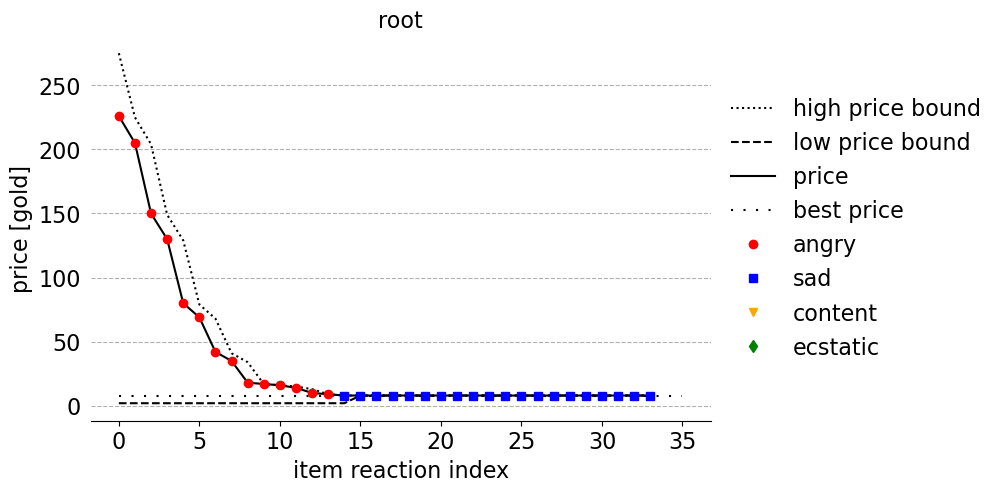

In [179]:
from moonlighter_pricing import query_data
import matplotlib.pylab as plt

prices_and_bounds = (
    query_data("""
        with price_bounds_and_item_insertion_orders as (
            select 
                row_number() over(partition by item) as item_insertion_order,
                * 
            from price_bound_history),
        new_and_old_price_bounds as (
            select
                a.item_insertion_order,
                a.reaction_id,
                a.item,
                a.low,
                a.high,
                b.item_insertion_order as previous_item_insertion_order,
                b.low as previous_low,
                b.high as previous_high
            from price_bounds_and_item_insertion_orders a
            left outer join price_bounds_and_item_insertion_orders b on
                a.item = b.item
                and a.item_insertion_order - 1 = b.item_insertion_order)
        select
            a.shelf_id,
            a.item,
            b.previous_low,
            b.previous_high,
            a.price,
            a.mood,
            b.low,
            b.high            
        from reactions a
        left outer join new_and_old_price_bounds b on
            a.rowid = b.reaction_id"""))
best_prices = (
    query_data("""
        select
            item,
            expensive_upper as best_price
        from price_reaction_bounds
    """)
)
fontsize = 16
legend_fontsize = fontsize
for item in prices_and_bounds['item'].unique():
    fig, ax = plt.subplots(1, 1)
    
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        ['previous_high']
        .plot(
            fontsize=fontsize,
            ax=ax,
            aa=True,
            figsize=(10, 5),
            label='high price bound',
            title=item.replace('_', ' '),
            color='black',
            # linestyle='dashdot',
            style=':',
            # ylim=[0, 3050]
        ))
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        ['previous_low']    
        .plot(
            fontsize=fontsize,
            ax=ax,
            label='low price bound',            
            # linestyle='dashdot',
            style='--',
            color='black',
            ))    
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        ['price']    
        .plot(
            ax=ax,
            fontsize=fontsize,
            style='-',
            color='black',
            label='price'))
    (
        ax.hlines(
            int(best_prices.pipe(lambda x: x[x['item'] == item])['best_price'].values[0]), 
            0,
            # ax.get_xticks().min(), 
            ax.get_xticks().max(), 
            # linestyle='densely dashdotted', 
            # linestyle=(0, (3, 5, 1, 5)),
            linestyle=(0, (1, 5)),
            color='black',
            label='best price'
        )
    )
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        .pipe(lambda x: x[x['mood'] == 'angry'])
        ['price']
        .plot(
            ax=ax,
            fontsize=fontsize,
            label='angry',
            color='red',
            style='o'))
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        .pipe(lambda x: x[x['mood'] == 'sad'])
        ['price']
        .plot(
            ax=ax,
            fontsize=fontsize,
            label='sad',
            color='blue',
            style='s'))
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        .pipe(lambda x: x[x['mood'] == 'content'])
        ['price']
        .plot(
            ax=ax,
            fontsize=fontsize,
            label='content',
            color='orange',
            style='v'))
    (
        prices_and_bounds
        .pipe(lambda x: x[x['item'] == item])
        .reset_index()
        .pipe(lambda x: x[x['mood'] == 'ecstatic'])
        ['price']
        .plot(
            ax=ax,
            fontsize=fontsize,
            label='ecstatic',
            color='green',
            style='d'))
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    plt.tick_params(left = False) 
    ax.grid(axis='y', linestyle='--')
    plt.xlabel('item reaction index', fontsize=fontsize)
    plt.ylabel('price [gold]', fontsize=fontsize)
    plt.title(item, fontsize=fontsize)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(
        fontsize=legend_fontsize,
        frameon=False, 
        loc='center left', 
        bbox_to_anchor=(1, 0.5))
    fig.savefig(
        f'/Users/cmshymansky/documents/code/websites/cmshymansky/website/static/img/reaction_price_bound_history_{item}.webp', 
        format='webp',
        bbox_inches="tight",
        dpi=300
    )

In [175]:
1.05**5

1.2762815625000004